# Convolutional Neural Net for MNIST Dataset

In [2]:
#Import libraries
import matplotlib.pylab as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [3]:
#Class to create and run the CNN model
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32, classes=10):
        super(CNN, self).__init__()
        
        #Takes in a one channel input, outputs 16 channels based on different patterns. 
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        #Maxpool to simplify output and only take extremes
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        #Second layer convolution, examining more complex patterns. 
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        #input the convolutional outputs to a single neuronal layer for classification. 
        self.fc1 = nn.Linear(out_2 * 4 * 4, classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [4]:
#Function for training the model
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    cost_list=[]
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)
            COST+=loss.data
        
        cost_list.append(COST)                                                                                                                                                                                                                       
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:                                   
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list, cost_list

In [5]:
#Get the datasets. Resize them to 16x16
IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

This number is: 1


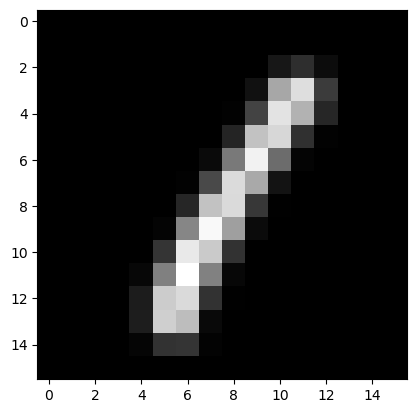

In [6]:
#ploting example
data_sample=train_dataset[3]
plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
print('This number is:', data_sample[1])

In [7]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32, classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# Training

In [8]:
#Train the model & Save
accuracy_list, loss_list, cost_list = train_model(model,train_loader,validation_loader,optimizer,n_epochs=4)
torch.save(model.state_dict(), 'MNIST_CNN_model.pth')

# Accuracy & Cost Per Training Epoch

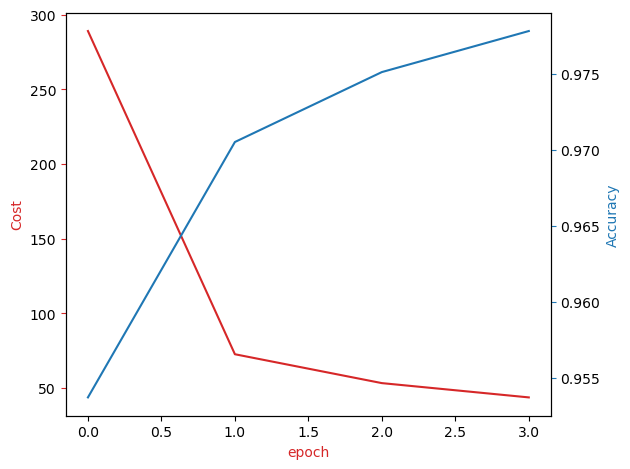

In [9]:
#Plot Accuracy & Cost
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

# Accuracy Per Class

In [52]:
#Load the model if training was skipped
# Load the model
model.load_state_dict(torch.load('MNIST_CNN_model.pth'))

# Ensure the loaded model is in evaluation mode
model.eval()

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)

In [11]:
# Calculate classification accuracy per digit class
# Initialize lists to count total occurrences and correct predictions per class (digits 0–9)
correct_per_class=[0]*10
class_occurrences=[0]*10
predictions=[]

# Loop through each sample in the validation dataset
for i in validation_dataset:
    # Reshape the image to match the input format expected by the model: [1, 1, H, W]
    sample=i[0].reshape(1,1,IMAGE_SIZE, IMAGE_SIZE)
    #Pass the sample through the model
    z=model(sample)
    # Get the predicted class (index of the highest logit value)
    _, yhat = torch.max(z, 1)
    predictions.append(yhat)
    # Increment the count of total samples for the true class
    class_occurrences[i[1]]+=1
    # If the prediction matches the true label, count it as a correct prediction
    if yhat==i[1]:
        correct_per_class[i[1]]+=1

# Convert to tensors and compute percentage accuracy per class 
accuracy_per_number=torch.tensor(correct_per_class)/torch.tensor(class_occurrences)*100

# Display accuracy per class
for i in range(len(accuracy_per_number)):
    print('Accuracy for ', i, ' is:', round(accuracy_per_number[i-1].item()), '%')

Accuracy for  0  is: 98 %
Accuracy for  1  is: 99 %
Accuracy for  2  is: 99 %
Accuracy for  3  is: 98 %
Accuracy for  4  is: 99 %
Accuracy for  5  is: 97 %
Accuracy for  6  is: 99 %
Accuracy for  7  is: 96 %
Accuracy for  8  is: 96 %
Accuracy for  9  is: 95 %


# Wrong Prediction Examples

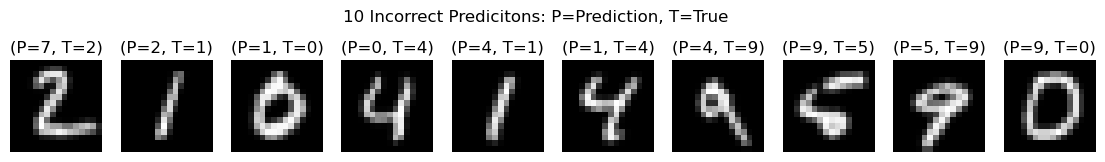

In [37]:
#Displaying first 10 incorrect predictions
count=0
plt.figure(figsize=(14, 2))
plt.suptitle('10 Incorrect Predicitons: P=Prediction, T=True')
for i in validation_dataset: #Looping through validation dataset
    if i[1]!=predictions[count]: # If unequal, display the prediction, actual number, & Image
        plt.subplot(1, 10, count + 1)
        plt.imshow(i[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
        plt.axis('off')
        string_title='(P=' + str(predictions[count].item()) +', T='+ str(i[1]) + ')'
        plt.title(string_title)
        count+=1   
    if count==10: # Break the loop after 10 wrong samples have been shown
        break

# Correct Prediction Examples

In [38]:
correct_predictions = {i: [] for i in range(10)}

In [13]:
# Dictionary to hold correct samples per class
correct_predictions = {i: [] for i in range(10)}
count = {i: 0 for i in range(10)}  # Track how many we’ve added per class

# Loop through dataset and predictions
# Presonal Note: enumerate allows looping through each index, and can allow access to the items at that index. 
for idx, (img, label) in enumerate(validation_dataset):
    pred = predictions[idx]
    
    if label == pred and count[label] < 10:
        correct_predictions[label].append(img)
        count[label] += 1
    
    # Break early if we've collected 10 for every class
    if all(c == 10 for c in count.values()):
        break

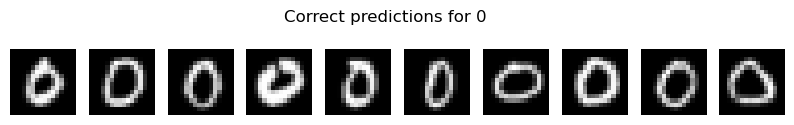

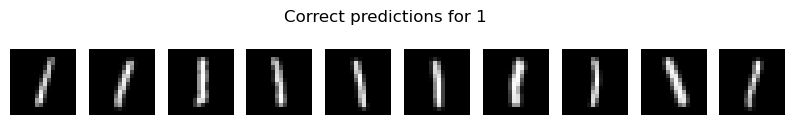

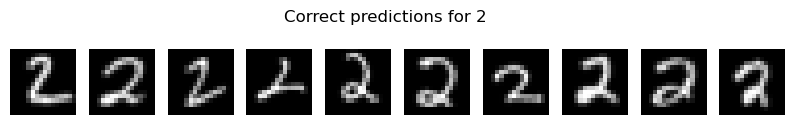

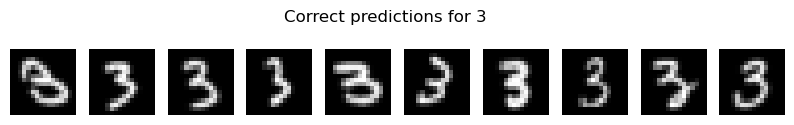

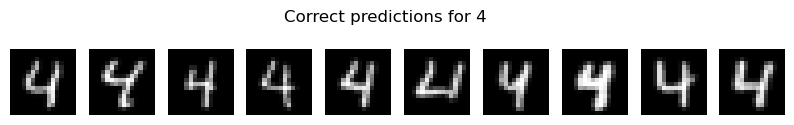

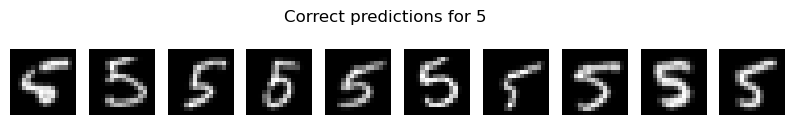

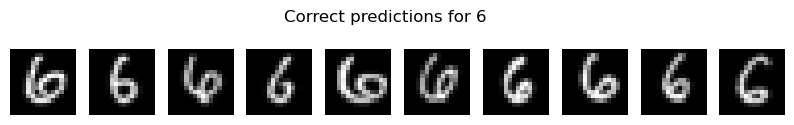

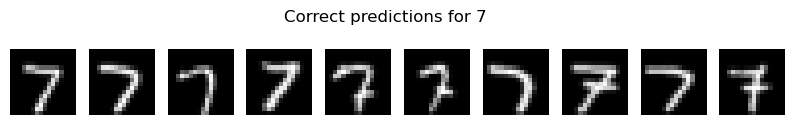

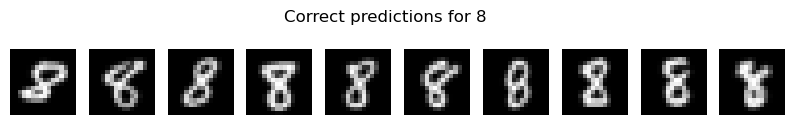

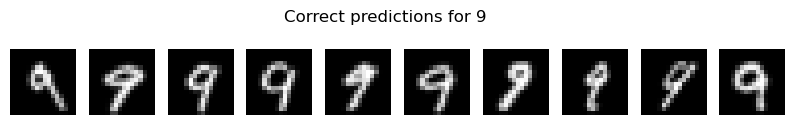

In [14]:
for digit in range(10):
    plt.figure(figsize=(10, 1.5))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(correct_predictions[digit][i].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Correct predictions for {digit}")
    plt.show()